# Importing and Exploring data 
<br>Dataset from ATP matches 
<br>Lin Zhou, Sept. 2018


In [2]:
#### imports ####
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os
import glob


# configurations
%matplotlib inline  
#save_path = 'analysis_results/'  # folder for saving analysis results 


In [3]:
#### functions ####
def import_csv (file_path, separator = ',', add_day_of_week = True):
    """
    import csv file from path, remove unnamed columns, and (by default) get day of the week from date
    
    variables
    file_path: only file name if in the same folder as script
    separator: separator of columns, defult = ','
    add_day_of_week: True: (by default) get day of the week
    """
    
    # read csv file into padas dataframe
    df_raw = pd.read_csv(file_path, sep = separator, encoding = "ISO-8859-1")  
    
    # drop unnamed columns.. 
    df = df_raw.drop(df_raw.columns[df_raw.columns.str.contains('unnamed',case = False)],axis = 1)
    
    # and get weekdays from dates 
    df['tourney_date'] = pd.to_datetime(df['tourney_date'], format='%Y%m%d')  # convert day format into datetime
    df['day_of_week'] = df['tourney_date'].dt.weekday_name  # get day name
    #df['day_of_week'] = df['Day'].dt.weekday  # get day as number, Mon = 0
    
    # remove timestamp from datetime format on 'Day' column
    df['tourney_date'] =df['tourney_date'].dt.date 
    
    return df


def get_finals (file_path, separator = ',', add_day_of_week = True):
    """
    import csv files into dataframe and get rows for finals
    """
    df = import_csv(file_path)
    df_finals = df.loc[df['round'] == 'F']
    
    return df_finals

In [4]:
#### Main ####

# check out one file 
# import csv 
folder_path = '../data/external/atp_matches/'
file_path = '../data/external/atp_matches/atp_matches_2017.csv'
df = import_csv (file_path)


In [5]:
os.path.join(folder_path, '*.csv')

'../data/external/atp_matches/*.csv'

In [6]:
# basic info
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2886 entries, 0 to 2885
Data columns (total 50 columns):
tourney_id            2886 non-null object
tourney_name          2886 non-null object
surface               2886 non-null object
draw_size             2886 non-null int64
tourney_level         2886 non-null object
tourney_date          2886 non-null object
match_num             2886 non-null int64
winner_id             2886 non-null int64
winner_seed           1222 non-null float64
winner_entry          366 non-null object
winner_name           2886 non-null object
winner_hand           2884 non-null object
winner_ht             2289 non-null float64
winner_ioc            2886 non-null object
winner_age            2884 non-null float64
winner_rank           2869 non-null float64
winner_rank_points    2869 non-null float64
loser_id              2886 non-null int64
loser_seed            700 non-null float64
loser_entry           561 non-null object
loser_name            2886 non-nul

,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,winner_entry,...,l_ace,l_df,l_svpt,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,day_of_week
0,2017-M020,Brisbane,Hard,32,A,2017-01-02,300,105777,7.0,NaN,...,4.0,0.0,69.0,49.0,36.0,9.0,12.0,2.0,5.0,Monday
1,2017-M020,Brisbane,Hard,32,A,2017-01-02,299,105777,7.0,NaN,...,4.0,3.0,61.0,28.0,24.0,16.0,10.0,2.0,4.0,Monday
2,2017-M020,Brisbane,Hard,32,A,2017-01-02,298,105453,3.0,NaN,...,9.0,2.0,61.0,37.0,27.0,10.0,10.0,0.0,2.0,Monday
3,2017-M020,Brisbane,Hard,32,A,2017-01-02,297,105683,1.0,NaN,...,4.0,0.0,84.0,61.0,39.0,14.0,14.0,2.0,4.0,Monday
4,2017-M020,Brisbane,Hard,32,A,2017-01-02,296,105777,7.0,NaN,...,6.0,5.0,82.0,37.0,29.0,24.0,14.0,4.0,7.0,Monday


Note: 
<br> matches from the same tournament have the same dates --> first only look at finals

In [7]:
# extract rows for finals 
df_finals = df.loc[df['round'] == 'F']
print('number of finals = ' + str(df_finals.shape[0]))

number of finals = 67


Text(0,0.5,'Number of Matches')

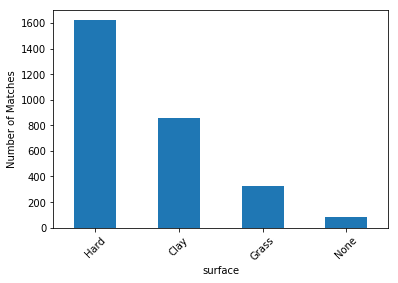

In [8]:
# count matches by surface type
finals_surface_count = df.groupby('surface', sort=False)['surface'].size() 

# plot count for surface types 
fig = finals_surface_count.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of Matches')

Text(0,0.5,'Number of Matches')

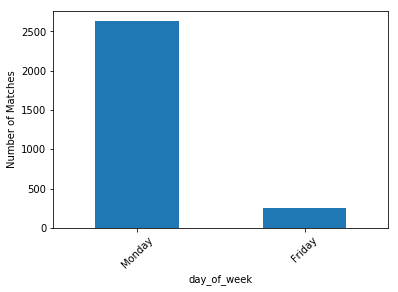

In [9]:
# count matches by day of the week
finals_weekday_count = df.groupby('day_of_week', sort=False)['day_of_week'].size() 

# plot count for surface types 
fig = finals_weekday_count.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of Matches')

the day of match is not correct for finals, leave the date analysis for now

## Analyzing finals
> - distribution of winner age

In [10]:
# load finals data from several years
all_files = glob.glob(os.path.join(folder_path, 'atp_matches_*.csv')) # make a list of file paths
df_finals = pd.concat([get_finals(file) for file in all_files])

# add year column
df_finals['tourney_date'] =  pd.to_datetime(df_finals['tourney_date'])
df_finals['tourney_year'] = df_finals['tourney_date'].dt.year
df_finals.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 26 to 1205
Data columns (total 51 columns):
tourney_id            363 non-null object
tourney_name          363 non-null object
surface               363 non-null object
draw_size             363 non-null int64
tourney_level         363 non-null object
tourney_date          363 non-null datetime64[ns]
match_num             363 non-null int64
winner_id             363 non-null int64
winner_seed           294 non-null float64
winner_entry          25 non-null object
winner_name           363 non-null object
winner_hand           363 non-null object
winner_ht             329 non-null float64
winner_ioc            363 non-null object
winner_age            363 non-null float64
winner_rank           363 non-null float64
winner_rank_points    363 non-null float64
loser_id              363 non-null int64
loser_seed            258 non-null float64
loser_entry           18 non-null object
loser_name            363 non-null object
los

1.50463900419 0.175547385763
ages in finals are not significantly different from each year


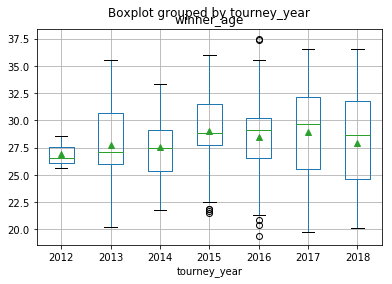

In [18]:
# plot distribution of winner age
final_age_plt = df_finals.boxplot(column = ['winner_age'], by = 'tourney_year', showmeans = True)

# one way ANOVA test on ages of players in finals, 
# p_value < 0.05: ages are significantly different; p_value > 0.05: ages are not significantly different
f_value, p_value = stats.f_oneway(df_finals['winner_age'][df_finals['tourney_year'] == 2012],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2013],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2014],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2015],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2016],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2017],
                                  df_finals['winner_age'][df_finals['tourney_year'] == 2018])

print(f_value, p_value)
if p_value <= 0.05:
    print('ages in finals significantly different from each year')
else:
    print('ages in finals are not significantly different from each year')
